In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib

/Users/heeseok/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

In [2]:
lda = joblib.load('minwon_lda.pkl')

In [4]:
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=1, evaluate_every=-1,
                          learning_decay=0.7, learning_method='online',
                          learning_offset=10.0, max_doc_update_iter=100,
                          max_iter=15, mean_change_tol=0.001, n_components=21,
                          n_jobs=None, perp_tol=0.1, random_state=None,
                          topic_word_prior=0.1, total_samples=1000000.0,
                          verbose=0)

In [5]:
lda.components_

array([[1.00031493e-01, 1.00012876e-01, 9.74652532e-01, ...,
        1.00039085e-01, 1.51169505e-01, 6.61490154e+02],
       [1.00030095e-01, 1.00010449e-01, 1.00017041e-01, ...,
        1.00038791e-01, 1.00019978e-01, 1.00023673e-01],
       [9.73839220e+01, 1.00022342e-01, 1.00019224e-01, ...,
        1.00045181e-01, 1.00026186e-01, 1.00017501e-01],
       ...,
       [1.00030522e-01, 1.00023915e-01, 1.00016636e-01, ...,
        1.00022596e-01, 1.00030373e-01, 1.00012327e-01],
       [1.09389878e+01, 1.00021245e-01, 1.00014880e-01, ...,
        1.00045920e-01, 1.00015916e-01, 1.00016146e-01],
       [1.00021509e-01, 1.00027865e-01, 1.00008854e-01, ...,
        1.00023620e-01, 1.00014034e-01, 1.00009150e-01]])

In [6]:
data = pd.read_csv('jin_final_data.csv')
data_ = data[data.site_no!=0]
data_ = data_[data_.site_no!=1]
num_removed=[re.sub('\d','',data_.controlled_collection.iloc[_]) for _ in range(len(data_.controlled_collection))]

/Users/heeseok/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
stop_words = ['말씀', '안녕', '서울','서울시', '관리','대한','대해','대하','민원','관련','경우','가정','행복',
             '해당','사항','내용','문의','진행','요청','확인','이용','개최','주민','처리','나라','서울특별시',
             '생각','여부','연락','주신','구정','구청','시간','부탁','조치','의견','관심','첨부파일',
              '관련','하십니까','애정','하십니까','주시','고객','안녕하십니까','사람','시민','선생님','답변','신청',
             '기타','때문','현실','주무관','성심','성의껏','양해','다시','한번','다시한번','저희','때문','추후','질문',
             '어디','거기','여기','저기','실시','최선','먼저','성심껏','사진','사용','정말','문제','아래','불편','주시',
              '본인','업무','가정','행복','제발','정도','부분','읍니']

raw_tf = CountVectorizer(max_features=5000,stop_words=set(stop_words))
raw_tf_matrix = raw_tf.fit_transform(num_removed)

In [8]:
result = lda.transform(raw_tf_matrix)
terms = raw_tf.get_feature_names()
get_topics(lda.components_,terms)
perp = lda.perplexity(raw_tf_matrix)

Topic 1: [('도로', 43078.28), ('차량', 18513.62), ('통행', 15790.54), ('인도', 9898.89), ('교통', 8973.07)]
Topic 2: [('버스', 16602.46), ('마을', 8077.66), ('교통', 7128.51), ('노선', 5306.89), ('운행', 4676.11)]
Topic 3: [('지역', 9250.17), ('용산', 8588.64), ('구민', 8177.66), ('거리', 5815.01), ('용산구', 5396.09)]
Topic 4: [('도서관', 10096.64), ('운영', 9536.04), ('홈페이지', 6018.47), ('정보', 4521.34), ('인터넷', 3529.12)]
Topic 5: [('건물', 25299.47), ('공사', 13739.08), ('건축', 12150.74), ('피해', 10348.98), ('신축', 9178.54)]
Topic 6: [('과태료', 15562.08), ('부과', 12785.23), ('단속', 12709.28), ('담배', 9883.02), ('위반', 8531.97)]
Topic 7: [('조합', 9140.97), ('주택', 8802.41), ('등록', 6349.41), ('서류', 4741.83), ('자동차', 4720.95)]
Topic 8: [('신고', 21056.63), ('접수', 10832.17), ('부서', 9636.09), ('시정', 8504.26), ('현장', 7743.94)]
Topic 9: [('안내', 10427.67), ('과장', 6524.26), ('강서', 6015.7), ('결과', 5295.77), ('지도', 4406.81)]
Topic 10: [('주차', 75573.89), ('단속', 46828.63), ('불법', 32862.47), ('차량', 32423.13), ('주차장', 20513.9)]
Topic 11: [('보호', 6507.

In [9]:
perp

1070.0547024968114

<BarContainer object of 21 artists>

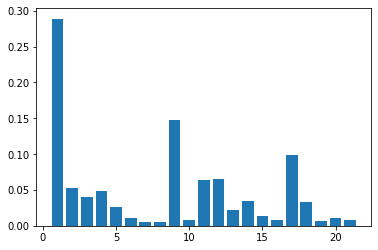

In [10]:
plt.bar(range(1,22),result[10000])

In [12]:
len(terms),terms

(5000,
 ['가가',
  '가건물',
  '가게',
  '가격',
  '가결',
  '가계',
  '가곡',
  '가공',
  '가관',
  '가구',
  '가기',
  '가까이',
  '가끔',
  '가나',
  '가내',
  '가능',
  '가능성',
  '가다가',
  '가도',
  '가동',
  '가득',
  '가든',
  '가뜩이나',
  '가라',
  '가락',
  '가량',
  '가로',
  '가로등',
  '가로막',
  '가로변',
  '가로수',
  '가로수길',
  '가루',
  '가림',
  '가면',
  '가방',
  '가산',
  '가산금',
  '가상',
  '가설',
  '가세',
  '가수',
  '가스',
  '가슴',
  '가시',
  '가액',
  '가야',
  '가양',
  '가양동',
  '가옥',
  '가요',
  '가운데',
  '가을',
  '가의',
  '가이드',
  '가이드라인',
  '가입',
  '가장',
  '가장자리',
  '가전',
  '가전제품',
  '가제',
  '가족',
  '가족관계등록부',
  '가중',
  '가지',
  '가지치기',
  '가축',
  '가치',
  '가판',
  '가해',
  '각각',
  '각도',
  '각심',
  '각자',
  '각종',
  '간격',
  '간다',
  '간담',
  '간선',
  '간식',
  '간염',
  '간의',
  '간이',
  '간접',
  '간접흡연',
  '간주',
  '간판',
  '간호사',
  '간혹',
  '갈등',
  '갈수',
  '갈수록',
  '갈현동',
  '감경',
  '감기',
  '감당',
  '감독',
  '감동',
  '감량',
  '감리',
  '감사',
  '감소',
  '감수',
  '감시',
  '감시카메라',
  '감안',
  '감염',
  '감염병',
  '감정',
  '감정평가',
  '감히',
  '갑자기',
  '갓길',
  '강구',
  '강남',
  '강남구',
  '강남대로',
  '강

In [29]:
query_raw_tf = CountVectorizer(vocabulary=terms,stop_words=stop_words)
query_raw_tf_matrix = query_raw_tf.fit_transform(['장지동 자전거 도로 자전거 주차장 설치'])

In [30]:
t = lda.transform(query_raw_tf_matrix)

In [31]:
np.where(t[0]==max(t[0]))

(array([17]),)

In [32]:
t

array([[0.06200482, 0.06154627, 0.04964297, 0.03703704, 0.03739421,
        0.03703704, 0.03703704, 0.03703707, 0.03705178, 0.07041703,
        0.03703704, 0.03712617, 0.03718775, 0.03703704, 0.03917656,
        0.0370401 , 0.03703704, 0.15693285, 0.03723628, 0.03703721,
        0.04094671]])

In [33]:
joblib.dump(query_raw_tf,'minwon_query_tf.pkl')

['minwon_query_tf.pkl']

In [3]:
query_raw_tf = joblib.load('minwon_query_tf.pkl')


In [5]:
query_raw_tf_matrix = query_raw_tf.fit_transform(['화랑대역 흡연'])

In [8]:
t = lda.transform(query_raw_tf_matrix)[0]

In [9]:
np.where(t==max(t))

(array([5]),)